# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [1]:
import pandas as pd

## imports for Python, Pandas

In [2]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [3]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [4]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [5]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [6]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

In [7]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

### 1. Find the top 10 countries with the most projects

In [8]:
# import necessary libraries
import pandas as pd
from pandas.io.json import json_normalize
import numpy as np
import matplotlib.pyplot as plt
import json

In [9]:
# load 'data/world_bank_projects.json' into variable 'data'
data = json.load((open('data/world_bank_projects.json')))

# normalize nested JSON into a pandas dataframe
df = json_normalize(data)

In [10]:
# subset df with the columns of interest, 'countryname' and 'project_name'
subset = df[['countryname', 'project_name']]

# groupby 'countryname' and count the # of projects
top10 = subset.groupby('countryname').count()

# sort the project_name counts in descending order and take only the top 10
top10 = top10.sort_values('project_name', ascending=False)[:10]
top10

,project_name
countryname,
People's Republic of China,19
Republic of Indonesia,19
Socialist Republic of Vietnam,17
Republic of India,16
Republic of Yemen,13
People's Republic of Bangladesh,12
Nepal,12
Kingdom of Morocco,12
Republic of Mozambique,11


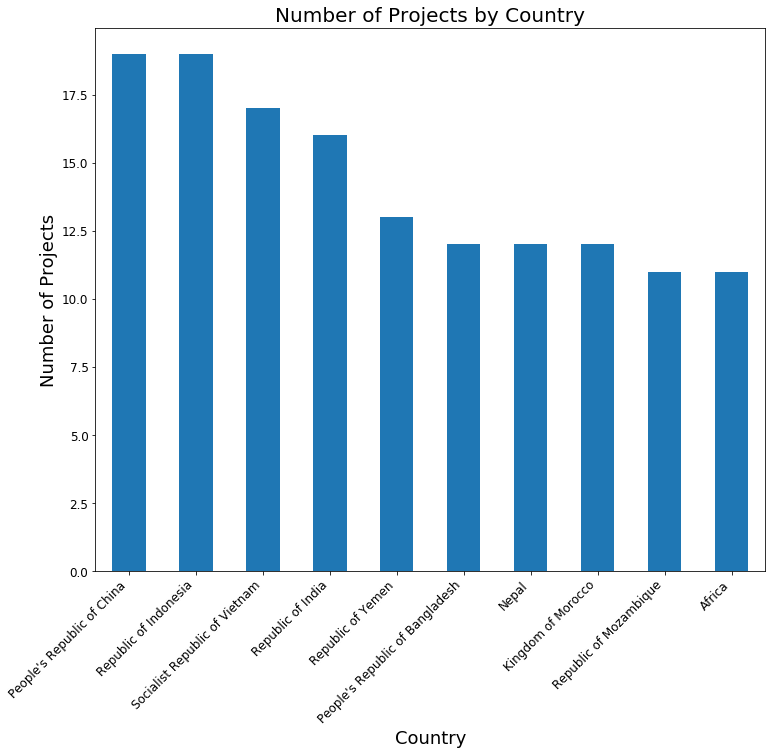

In [11]:
# visualize the data in a bar chart
ax = top10.plot(kind='bar', figsize=(12, 10), legend=False)
plt.title('Number of Projects by Country', fontsize=20)
plt.xlabel('Country', fontsize=18)
plt.ylabel('Number of Projects', fontsize=18)
plt.xticks(fontsize=12, rotation=45, horizontalalignment='right', verticalalignment='top')
plt.yticks(fontsize=12)

plt.show()

### 2. Find the top 10 major project themes (using column 'mjtheme_namecode')

In [12]:
# note the further nested heirarchy of the 'mjtheme_namecode' key
df['mjtheme_namecode'][0]

[{'code': '8', 'name': 'Human development'}, {'code': '11', 'name': ''}]

In [13]:
# normalize the data, this time pulling the 'mjtheme_namecode' field
themes = json_normalize(data, 'mjtheme_namecode')
themes.head()

,code,name
0,8,Human development
1,11,
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration


In [14]:
# get the project counts for the top 10 themes
top10_themes = themes.name.value_counts()[:10]
top10_themes

Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
                                                122
Social dev/gender/inclusion                     119
Trade and integration                            72
Urban development                                47
Name: name, dtype: int64

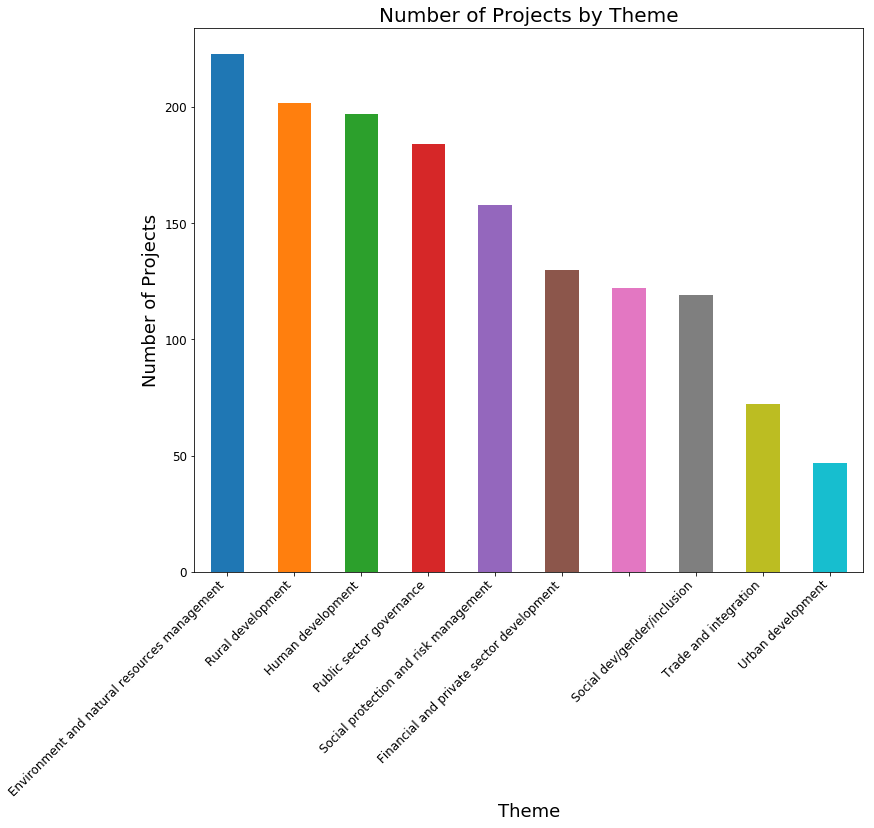

In [15]:
# plot the results
ax = top10_themes.plot(kind='bar', figsize=(12, 10), legend=False)
plt.title('Number of Projects by Theme', fontsize=20)
plt.xlabel('Theme', fontsize=18)
plt.ylabel('Number of Projects', fontsize=18)
plt.xticks(fontsize=12, rotation=45, horizontalalignment='right', verticalalignment='top')
plt.yticks(fontsize=12)

plt.show()

### 3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

We'll first create a dictionary to use as a look-up table for missing themes. This will map codes to themes.

In [16]:
# subset non-null values and drop duplicates
codes = themes[themes.name != ''].drop_duplicates()

# create a dictionary of this mapping
codes = dict(zip(codes.code, codes.name))
codes

{'8': 'Human development',
 '1': 'Economic management',
 '6': 'Social protection and risk management',
 '5': 'Trade and integration',
 '2': 'Public sector governance',
 '11': 'Environment and natural resources management',
 '7': 'Social dev/gender/inclusion',
 '4': 'Financial and private sector development',
 '10': 'Rural development',
 '9': 'Urban development',
 '3': 'Rule of law'}

In [17]:
# use the codes dict to fill in missing names based on code
themes_fill = themes.copy()
themes_fill.name = themes_fill.apply(lambda x: codes[x.code], axis=1)

# double check that there are no more missing values
themes_fill.name.isnull().any()

False

In [18]:
# get the top 10 counts for each theme
top10_themes_fill = themes_fill.name.value_counts()[:10]
top10_themes_fill

Environment and natural resources management    250
Rural development                               216
Human development                               210
Public sector governance                        199
Social protection and risk management           168
Financial and private sector development        146
Social dev/gender/inclusion                     130
Trade and integration                            77
Urban development                                50
Economic management                              38
Name: name, dtype: int64

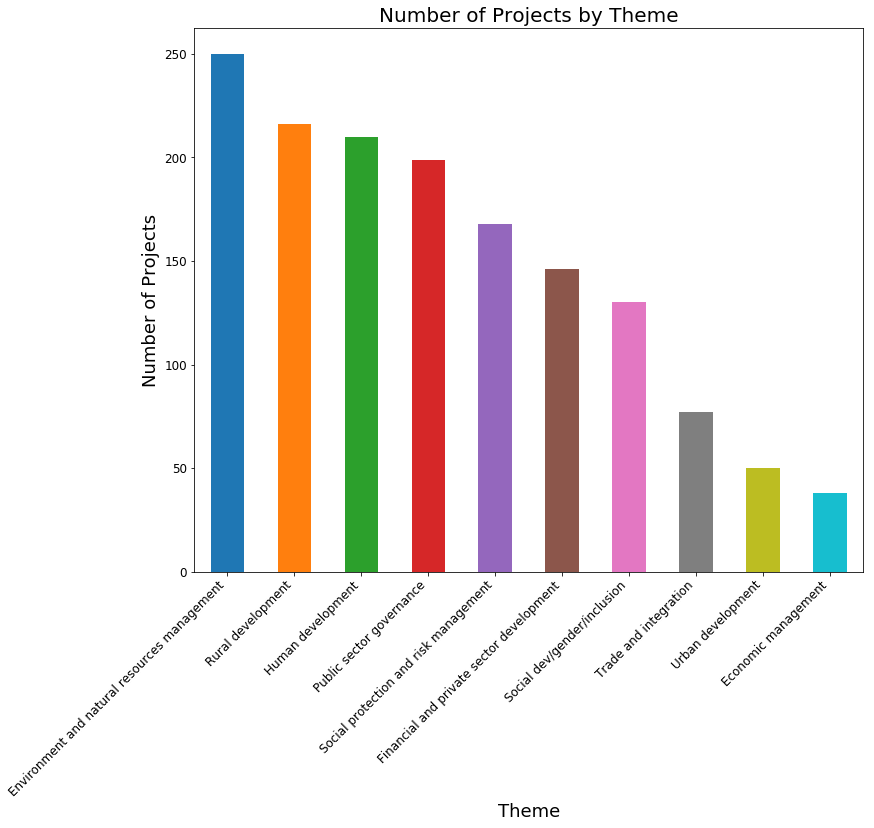

In [19]:
# plot the new results without missing data
ax = top10_themes_fill.plot(kind='bar', figsize=(12, 10), legend=False)
plt.title('Number of Projects by Theme', fontsize=20)
plt.xlabel('Theme', fontsize=18)
plt.ylabel('Number of Projects', fontsize=18)
plt.xticks(fontsize=12, rotation=45, horizontalalignment='right', verticalalignment='top')
plt.yticks(fontsize=12)

plt.show()